# Case Study on Measures of Central Tendency and Dispersion

An Institution wishes to find out their student’s ability in maths, reading and writing skills. The Institution wants to do an exploratory study to check the following information.

1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on

    ● Gender    
    ● Test preparation course
    
    
4. What do you think about the scoring variation for math, reading and writing based on

    ● Gender    
    ● Test preparation course
    
    
5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv  file containing the dataset
df=pd.read_csv("StudentsPerformance.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

In [3]:
#displaying the dataset
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


We can see that there are 1000 rows and 8 columns in the given dataset

In [4]:
#checking for null values and displaying concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the concise summary of the dataset we can see that there are no null values present in the dataset and there are 3 cloumns bearing integer values and 5 columns bearing string values present in the dataset. From the dataset we can also see that there are spaces present in 5 column names so we need to replace them with underscore.

In [5]:
#renaming the column names and hence replacing space(" ") by underscore("_")
column_names=df.columns
for column in column_names:
    new_name=column.replace(" ","_")
    df.rename(columns={column:new_name},inplace=True)

In [6]:
#displaying the dataset after renaming the columns
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [7]:
#displaying the discriptive  statistics of the dataset.
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
#displaying the discriptive  statistics of the dataset reardless of the datatype.
df.describe(include="all")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.001000,69.195000,68.119000
std,NaN,NaN,NaN,NaN,NaN,15.569567,14.706436,15.226381
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.250000,79.000000


# 1. Finding out how many males and females participated in the test.

Text(0.5, 1.0, 'Count of Male and Female Particpants')

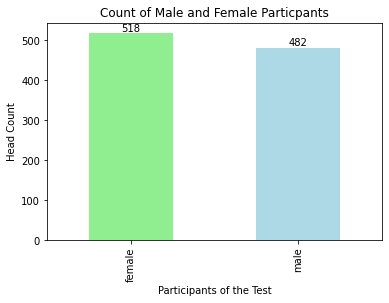

In [9]:
#displaying the count of each value present in the column 'gender'
ax=df.gender.value_counts().plot.bar(color=['lightgreen', 'lightblue'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Participants of the Test")
plt.ylabel("Head Count")
plt.title("Count of Male and Female Particpants")

From the above output we can see that 518 female students participated in the test and 482 male students participated in the test which also indicates that the number of male participants are less than the number of female participants.

# 2. What do you think about the students' parental level of education?

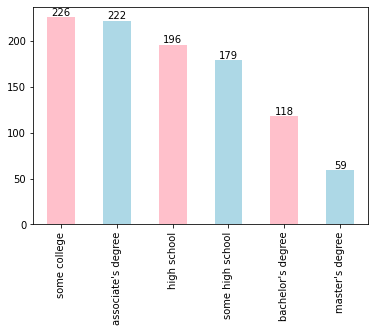

In [10]:
#displaying the chart on parental level of education
ax=df.parental_level_of_education.value_counts().plot.bar(color=['pink','lightblue'])
for container in ax.containers:
    ax.bar_label(container)

According to the above output we can see that all the 1000 parents have an education level above or equal to highschool from which we can say the illiteracy rate among the parents is equal to 0 %. We can also clearly see that parental level of education is clearly divided into 6 categories or levels.

    ●19.6% of the parents have to gone to high school.

    ●17.9% of the parents have gone to some high school. 

    ●22.6% of the parents have gone to some college.

    ●22.2% parents hold a associate's degree.

    ●11.8% parents hold a bachelor's degree.

    ●5.9% of the parents even hold a master's degree.

So we can say that all the parents of the students have completed the basic level of education and 39.9% of them are well educated and are degree holders.


# 3. Who scores the most on average for math, reading and writing based on:

<h3>● Gender
    
● Test preparation course</h3>

In [11]:
#calculating the average of the math score, reading score and writing score
df['average']=df.mean(axis = 1, skipna = True)

In [12]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
5,female,group B,high school,free/reduced,completed,23,44,36,34.333333
6,female,group B,some high school,free/reduced,none,24,38,27,29.666667
7,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
8,female,group D,some high school,free/reduced,none,19,34,32,28.333333
9,female,group C,high school,standard,none,29,29,30,29.333333


<h5>Grouped by Gender</h5>

In [13]:
#Calculating the maximum value of the average when grouped by gender
df.groupby('gender')['average'].max()

gender
female    100.0
male      100.0
Name: average, dtype: float64

<h5>Grouped by Test Preparation Course</h5>

In [14]:
#Calculating the maximum value of the average when grouped by test preparation course
df.groupby('test_preparation_course')['average'].max()

test_preparation_course
completed    100.0
none         100.0
Name: average, dtype: float64

In [15]:
#displaying the student records containing the highest average marks
df[(df['average']==100.0)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
516,female,group E,bachelor's degree,standard,none,100,100,100,100.0
517,female,group E,associate's degree,standard,none,100,100,100,100.0
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.0


The above filtered dataset gives the student records with the maximum of average scores of maths,reading and writing. 

All of them belonging to the race/ethinicity of 'group E' among which there are 2 female students and a male student.  

When considering the fact whether they have taken the test preparation course or not the male student who has completed the course scored 100.0 as average of all scores while 2 female students who did not attend the course also attained the same score or the maximum possible score as the male student who completed the course. So the relevance of attending the course is at question here and we can also see that among the 100% scorers female students are more.

In [16]:
#dropping column average after calculations
df.drop('average',axis=1,inplace=True)
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


# 4. What do you think about the scoring variation for math, reading and writing based on:

<h3>● Gender

● Test preparation course</h3>

<h5>Grouped by Gender</h5>

In [17]:
#calculating the zscores of the scores grouped by gender and saving to a temporary dataframe. 
df_duplicate=df[['gender','race/ethnicity','parental_level_of_education','lunch','test_preparation_course']].join(df.groupby(['gender']).transform(zscore))

In [18]:
df_duplicate

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,-3.957454,-3.861245,-4.212074
1,female,group B,high school,free/reduced,none,-3.457906,-3.375036,-3.335502
2,female,group B,some high school,free/reduced,none,-2.833469,-2.819369,-2.998359
3,female,group B,some college,standard,none,-3.270575,-2.402618,-2.728645
4,female,group C,some college,free/reduced,none,-2.583695,-2.333160,-2.661216
5,female,group B,high school,free/reduced,completed,-2.521251,-1.985867,-2.458930
6,female,group B,some high school,free/reduced,none,-2.458808,-2.402618,-3.065788
7,female,group D,associate's degree,free/reduced,none,-2.333921,-2.888827,-2.324073
8,female,group D,some high school,free/reduced,none,-2.771026,-2.680452,-2.728645
9,female,group C,high school,standard,none,-2.146590,-3.027744,-2.863502


In [19]:
#calculating the maximum zscore of math score
df_duplicate['math_score'].max()

2.2869069782210545

In [20]:
#calculating the minimum zscore of math score
df_duplicate['math_score'].min()

-3.957454493069369

Here we can see that the z-score of math score lies between -3.957454493069369 and 2.2869069782210545. A large z-score by itself is not prima facie proof of a literary phonomenon, but it does serve as a useful flag for an area that needs further exploration. As we are looking at quantitative data, a Z-score above +/-2 is unusual while a score above +/- three is extremely unusual and bears further scrutiny. So we can say that the data is highly dispersed.

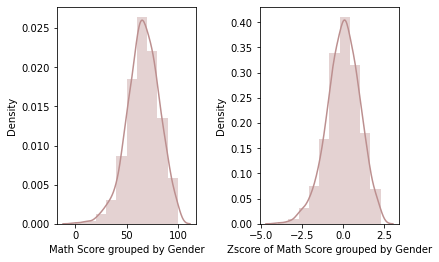

In [21]:
fig, ax =plt.subplots(1,2)
sns.distplot(df['math_score'] , color="rosybrown", axlabel='Math Score grouped by Gender',ax=ax[0],bins=10)
sns.distplot(df_duplicate['math_score'] , color="rosybrown", axlabel='Zscore of Math Score grouped by Gender', ax=ax[1],bins=10)
fig.show()
fig.tight_layout(pad=2.0)

From the frequency distribution of zscores of math score grouped by gender we can see that the graph is very slightly left-skewed which means that mean and median are not equal.

In [22]:
#calculating the maximum zscore of reading score
df_duplicate['reading_score'].max()

2.437536625762169

In [23]:
#calculating the minimum zscore of reading score
df_duplicate['reading_score'].min()

-3.8612449611790147

Here we can see that the z-score of reading score lies between -3.8612449611790147 and 2.437536625762169. A large z-score by itself is not prima facie proof of a literary phonomenon, but it does serve as a useful flag for an area that needs further exploration. As we are looking at quantitative data, a Z-score above +/-2 is unusual while a score above +/- three is extremely unusual and bears further scrutiny. So we can say that the data is highly dispersed.

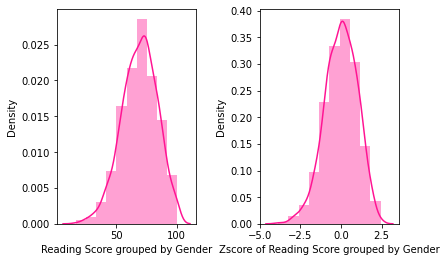

In [24]:
fig, ax =plt.subplots(1,2)
sns.distplot(df['reading_score'] , color="deeppink", axlabel='Reading Score grouped by Gender',ax=ax[0],bins=10)
sns.distplot(df_duplicate['reading_score'] , color="deeppink", axlabel='Zscore of Reading Score grouped by Gender',ax=ax[1],bins=10)
fig.show()
fig.tight_layout(pad=2.0)

From the frequency distribution of zscores of reading score grouped by gender similar to that of math score we can see that the graph is very slightly left-skewed which means that mean and median are not equal.

In [25]:
#calculating the maximum zscore of writing score
df_duplicate['writing_score'].max()

2.5719647140467727

In [26]:
#calculating the minimum zscore of writing score
df_duplicate['writing_score'].min()

-4.212073554143694

Here we can see that the z-score of writing score lies between -4.212073554143694 and 2.5719647140467727. A large z-score by itself is not prima facie proof of a literary phonomenon, but it does serve as a useful flag for an area that needs further exploration. As we are looking at quantitative data, a Z-score above +/-2 is unusual while a score above +/- three is extremely unusual and bears further scrutiny. So we can say that the data is highly dispersed even when compared to math score and writing sccore.

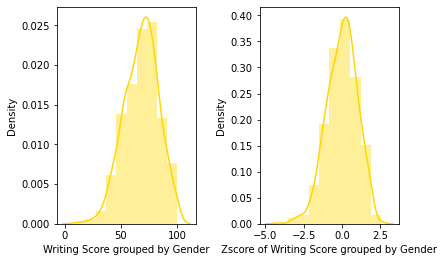

In [27]:
fig, ax =plt.subplots(1,2)
sns.distplot(df['writing_score'] , color="gold", axlabel='Writing Score grouped by Gender',ax=ax[0],bins=10)
sns.distplot(df_duplicate['writing_score'] , color="gold", axlabel='Zscore of Writing Score grouped by Gender',ax=ax[1],bins=10)
fig.show()
fig.tight_layout(pad=2.0)

From the frequency distribution of zscores of writing score grouped by gender as same as the case in math score and reading score we can see that the graph is left-skewed which means that mean and median are not equal.

In [28]:
df.groupby('gender')['math_score'].mean()

gender
female    63.376448
male      68.821577
Name: math_score, dtype: float64

In [29]:
df.groupby('gender')['math_score'].std()

gender
female    16.029928
male      14.556411
Name: math_score, dtype: float64

From the mean and standard deviation based on gender we can see that variation in math score for female students are more when compared to male students since the standard deviation for female students is greater than that for male students. Or we can say that the data is slightly more dispersed in the case of female students than in male students.

In [30]:
df.groupby('gender')['reading_score'].mean()

gender
female    72.590734
male      65.545643
Name: reading_score, dtype: float64

In [31]:
df.groupby('gender')['reading_score'].std()

gender
female    14.411018
male      14.149594
Name: reading_score, dtype: float64

From the mean and standard deviation for reading score based on gender we can see that variation in reading score for female students is equal when compared to male students since the standard deviation for female students is equal to that for male students. Or we can say that the data is equally dispersed in the case of female students and male students.

In [32]:
df.groupby('gender')['writing_score'].mean()

gender
female    72.467181
male      63.446058
Name: writing_score, dtype: float64

In [33]:
df.groupby('gender')['writing_score'].std()

gender
female    14.844842
male      14.227225
Name: writing_score, dtype: float64

From the mean and standard deviation for writing score based on gender we can see that variation in reading score for female students is equal when compared to male students since the standard deviation for female students is equal to that for male students. Or we can say that the data is equally dispersed in the case of female students and male students.

<h5>Grouped by Test Preparation Course</h5>

In [34]:
#calculating the zscores of the scores grouped by gender and saving to a temporary dataframe. 
df_duplicate=df[['gender','race/ethnicity','parental_level_of_education','lunch','test_preparation_course']].join(df.groupby(['test_preparation_course']).transform(zscore))

In [35]:
df_duplicate

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,-4.064735,-3.385333,-3.623296
1,female,group B,high school,free/reduced,none,-3.554968,-2.905799,-2.758356
2,female,group B,some high school,free/reduced,none,-2.917760,-2.357761,-2.425687
3,female,group B,some college,standard,none,-3.363805,-1.946732,-2.159551
4,female,group C,some college,free/reduced,none,-2.662876,-1.878227,-2.093018
5,female,group B,high school,free/reduced,completed,-3.238721,-2.232174,-2.926662
6,female,group B,some high school,free/reduced,none,-2.535434,-1.946732,-2.492221
7,female,group D,associate's degree,free/reduced,none,-2.407993,-2.426266,-1.760348
8,female,group D,some high school,free/reduced,none,-2.854039,-2.220751,-2.159551
9,female,group C,high school,standard,none,-2.216830,-2.563275,-2.292619


<AxesSubplot:xlabel='Zscore of Math Score grouped by Test Preparation Course', ylabel='Density'>

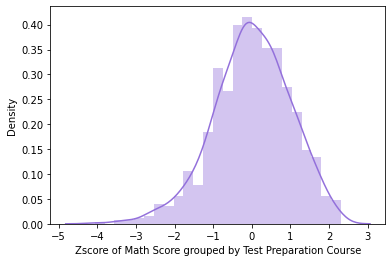

In [36]:
sns.distplot(df_duplicate['math_score'] , color="mediumpurple", axlabel='Zscore of Math Score grouped by Test Preparation Course')

From the frequency distribution of zscores of math score grouped by test preparation group we can see that the graph is left-skewed which means that mean and median are not equal.

<AxesSubplot:xlabel='Zscore of Reading Score grouped by Test Preparation Course', ylabel='Density'>

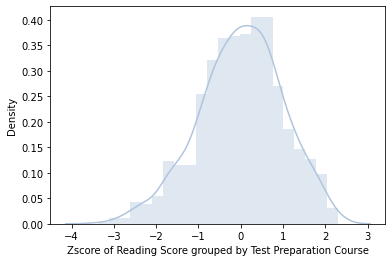

In [37]:
sns.distplot(df_duplicate['reading_score'] , color="lightsteelblue", axlabel='Zscore of Reading Score grouped by Test Preparation Course')

From the frequency distribution of zscores of reading score grouped by test preparation course as same as the case in math score we can see that the graph is left-skewed which means that mean and median are not equal.

<AxesSubplot:xlabel='Zscore of Writing Score grouped by Test Preparation Course', ylabel='Density'>

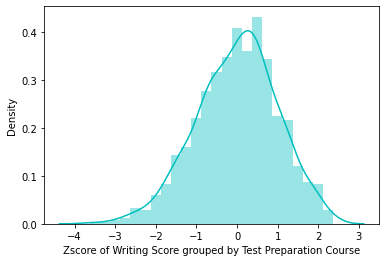

In [38]:
sns.distplot(df_duplicate['writing_score'] , color="c", axlabel='Zscore of Writing Score grouped by Test Preparation Course')

From the frequency distribution of zscores of writing score grouped by test preparation course as same as the case in math score and reading score we can see that the graph is left-skewed which means that mean and median are not equal.

In [39]:
df.groupby('test_preparation_course')['math_score'].mean()

test_preparation_course
completed    69.96648
none         63.78972
Name: math_score, dtype: float64

In [40]:
df.groupby('test_preparation_course')['math_score'].std()

test_preparation_course
completed    14.521847
none         15.705689
Name: math_score, dtype: float64

When looking at the above output we can see that the standard deviation for math score grouped by test preparation course for completed students are lower than that for unattended students.

In [41]:
df.groupby('test_preparation_course')['reading_score'].mean()

test_preparation_course
completed    74.175978
none         66.417445
Name: reading_score, dtype: float64

In [42]:
df.groupby('test_preparation_course')['reading_score'].std()

test_preparation_course
completed    13.537572
none         14.608896
Name: reading_score, dtype: float64

When looking at the above output we can see that the standard deviation for reading score grouped by test preparation course for completed students are lower than that for unattended students.

In [43]:
df.groupby('test_preparation_course')['writing_score'].mean()

test_preparation_course
completed    74.684358
none         64.457944
Name: writing_score, dtype: float64

In [44]:
df.groupby('test_preparation_course')['writing_score'].std()

test_preparation_course
completed    13.236412
none         15.041667
Name: writing_score, dtype: float64

When looking at the above output we can see that the standard deviation for writing score grouped by test preparation course for completed students are lower than that for unattended students.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [45]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [46]:
df.math_score.quantile(0.75)

77.0

In [47]:
df[(df['math_score']>=df.math_score.quantile(0.75))]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
419,female,group C,bachelor's degree,standard,none,77,88,87
420,female,group C,bachelor's degree,standard,completed,77,94,95
421,female,group C,some college,free/reduced,none,77,90,91
422,female,group C,some high school,standard,completed,77,90,85
423,female,group C,some high school,standard,none,77,91,88


We found that the 75% quartile value starts from 77.0 for math score which means the values in the 3rd quartile is on and above 77.0 and hence displaying the top 25% of the students who scored well in maths.

# OR

# Another Method

In [48]:
df_duplicate=df.sort_values('math_score',ascending=False)

In [49]:
df_duplicate.head(int(len(df)*(25/100)))

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
995,male,group E,some college,standard,completed,99,87,81
513,female,group E,bachelor's degree,standard,completed,99,100,100
514,female,group E,high school,standard,none,99,93,90


In this method we sort and order the dataset accoring to the math score and then find the top 25% of the students who scored well in maths and then display the dataset.

<h2>
Submitted by: Midhuna Prasad R
<br> 
    
NORKA DSA BATCH 2 2021
    
Submitted on: 01/12/2021
    
</h2>